In [1]:
# Import the necessary modules

# The PyBullet physics simulation library
import pybullet as p
import pybullet_data

# Numpy for numerical calculations and manipulations
import numpy as np

# Matplotlib to create the necessary plots
import matplotlib.pyplot as plt

In [3]:
# Bring in the kinematics module for the serial-2R robot

%run kinematics.ipynb

-2.220446049250313e-16 3.3306690738754696e-16
0.0 -1.1102230246251565e-16
3.3306690738754696e-16 -5.551115123125783e-16
2.55351295663786e-15 -3.885780586188048e-15
9.43689570931383e-16 -1.3877787807814457e-15
-2.220446049250313e-16 4.440892098500626e-16
-2.7755575615628914e-16 4.440892098500626e-16
2.6645352591003757e-15 -3.9968028886505635e-15
-6.661338147750939e-16 1.1102230246251565e-15
1.7486012637846216e-15 -2.6645352591003757e-15
4.163336342344337e-17 -5.551115123125783e-17
1.1102230246251565e-16 -2.220446049250313e-16
2.55351295663786e-15 -3.774758283725532e-15
-8.881784197001252e-15 1.3322676295501878e-14
5.689893001203927e-16 -8.326672684688674e-16
-6.661338147750939e-16 1.1102230246251565e-15
4.440892098500626e-16 -5.551115123125783e-16
-2.7755575615628914e-17 0.0
4.440892098500626e-16 -6.661338147750939e-16
-3.3306690738754696e-16 5.551115123125783e-16
-6.800116025829084e-16 1.2212453270876722e-15
-5.551115123125783e-16 7.771561172376096e-16
-5.759281940243e-16 8.88178419700

8.326672684688674e-17 0.0
5.2735593669694936e-15 -7.93809462606987e-15
-3.3306690738754696e-16 5.551115123125783e-16
0.0 0.0
2.886579864025407e-15 -4.3298697960381105e-15
1.3877787807814457e-17 -2.220446049250313e-16
1.1102230246251565e-16 -2.220446049250313e-16
2.7755575615628914e-16 -4.440892098500626e-16
-1.582067810090848e-15 2.4147350785597155e-15
8.881784197001252e-16 -1.2212453270876722e-15
-4.107825191113079e-15 5.995204332975845e-15
-2.7755575615628914e-16 4.440892098500626e-16
-5.828670879282072e-16 8.881784197001252e-16
-4.163336342344337e-16 6.661338147750939e-16
0.0 0.0
-5.551115123125783e-16 8.881784197001252e-16
3.0531133177191805e-16 -5.551115123125783e-16
-3.608224830031759e-16 4.440892098500626e-16
1.1102230246251565e-16 -2.220446049250313e-16
2.7755575615628914e-17 0.0
2.220446049250313e-16 -1.1102230246251565e-16
1.4432899320127035e-15 -2.1094237467877974e-15
-4.996003610813204e-16 7.216449660063518e-16
8.326672684688674e-17 -1.1102230246251565e-16
3.330669073875469

In [46]:
# Create an instance of the Physics Server and connect to it
# Use p.DIRECT to connect to the server without rendering a GUI
# Use p.GUI to create a GUI to render the simulation
client = p.connect(p.DIRECT) # or p.GUI


# Load the URDF of the plane that forms the ground
p.setAdditionalSearchPath(pybullet_data.getDataPath()) # Set the search path to find the plane.urdf file
plane = p.loadURDF("plane.urdf")


# Load the URDF of the robot
robot = p.loadURDF("scara_robot_left.urdf")

In [47]:
# Set the necessary parameters for the simulation

# Set the Gravity vector
p.setGravity(0,0,-9.81, physicsClientId = client)

# Set the simulation time-step
p.setTimeStep(0.001) #The lower this is, more accurate the simulation 

# You can be faster than real-time if you choose
#p.setRealTimeSimulation(0)  # we want to be faster than real time.

In [48]:
# Get the information about the robot
p.getNumJoints(robot)

for i in range(0, 8, 1):
    info = p.getJointInfo(robot, i) # For joint i
    print(info)


(0, b'joint_fix', 4, -1, -1, 0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'base_link', (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), -1)
(1, b'rotation1', 0, 7, 6, 1, 0.0, 0.0, -2.6, 2.6, 1000.0, 1000.0, b'arm1', (0.0, 0.0, 1.0), (0.0, 0.0, 0.20000000298023224), (0.0, 0.0, 0.0, 1.0), 0)
(2, b'rotation2', 0, 8, 7, 1, 0.0, 0.0, -3.0, 3.0, 1000.0, 1000.0, b'arm2', (0.0, 0.0, 1.0), (0.0, -1.0, 0.05000000074505806), (0.0, 0.0, 0.0, 1.0), 1)
(3, b'gripper_joint', 1, 9, 8, 1, 0.0, 0.0, -0.05, 0.0, 100.0, 100.0, b'gripper_link', (0.0, 0.0, 1.0), (0.0, -0.800000011920929, -0.05000000074505806), (0.0, 0.0, 0.0, 1.0), 2)
(4, b'finger1_joint', 1, 10, 9, 1, 0.0, 0.0, 0.0, 0.02, 100.0, 100.0, b'finger1', (0.0, 1.0, 0.0), (0.0, -0.03999999910593033, -0.23000000417232513), (0.0, 0.0, 0.0, 1.0), 3)
(5, b'finger2_joint', 1, 11, 10, 1, 0.0, 0.0, -0.02, 0.0, 100.0, 100.0, b'finger2', (1.0, 0.0, 0.0), (0.03999999910593033, 0.0, -0.23000000417232513), (0.0, 0.0, 0.0, 1.0), 3)
(6, b'finger3_joint', 1, 12, 11

In [199]:
# Get the joint state, i.e. its position, velocity, reaction forces, and torque

pos, vel, reaction_force, torque = p.getJointState(robot, 1) # Get state for joint 1
print(pos)


0.7639609130857135


In [50]:
# Enable the motors on the joints 
# This step is required to enable torque control. Refer to the documentation for more details.
p.setJointMotorControl2(robot, 1, p.VELOCITY_CONTROL, force=0)

In [51]:
# Use torque control mode to apply a torque at the joint

# Set the required torque
p.setJointMotorControl2(robot,1, p.TORQUE_CONTROL, force=5.0)


# Step through the simulation and capture the data
pos1 = []
for _ in range(1000):
    pos, vel, reaction_force, torque = p.getJointState(robot, 1)
    pos1.append(pos)
    p.stepSimulation()

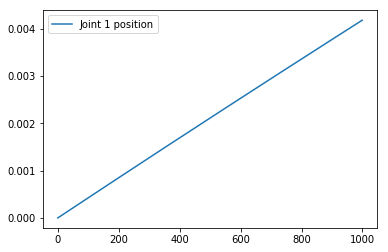

In [52]:
# Plot the position data
plt.figure(1)
plt.plot(np.array(pos1), label="Joint 1 position")
plt.legend()
plt.show()

In [195]:
# Create a Proportional control loop to regulate the position of the joint

p_des = 1.0 # Desired position of the joint

p_gain = 10 # Proportional gain
d_gain = 50 # Derivative gain

error = 0
error_old = 0
dt = 0.001 # Simulation time-step

pos1 = []
cf = []
for i in range(1000):
    
    #if i < 200:
    #    p_des = 1.0
    #elif i >= 200 and i < 400:
    #    p_des = 0.0
    #elif i >= 400 and i < 600:
    #    p_des = 1.0
    #elif i >= 600:
    #    p_des = 0.0
        
    # Get the joint state
    p_act, _, _, _ = p.getJointState(robot, 1)
    
    # Calculate the control input
    error_old = error
    error = p_des - p_act
    error_d = (error - error_old)/dt
    control_force = p_gain * error + d_gain * error_d
    control_force = np.clip(control_force, -1000, 1000)
    
    # Run the simulation for one time-step
    p.setJointMotorControl2(robot, 1, p.TORQUE_CONTROL, force=control_force)
    p.stepSimulation()
    
    # Store the data for plotting
    pos1.append(p_act)
    cf.append(control_force)
    

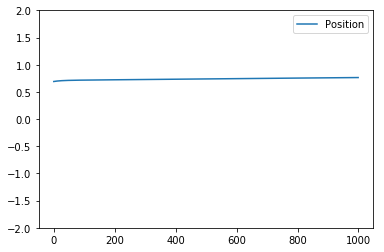

In [196]:
# Plot the data
plt.figure(2)
plt.plot(pos1, label="Position")
plt.ylim([-2,2])
#plt.plot(cf, label="Control Input")
plt.legend()
plt.show()

In [197]:
print(min(np.array(pos1)))
print(max(np.array(pos1)))

0.6913356884715519
0.7639135290562836


In [198]:
print(max(np.array(cf)))
print(min(np.array(cf)))

1000.0
-42.722821091637776


In [232]:
pos1 = []
torque1 = []

for _ in range(5000):
    p_act, _, _, t_act = p.getJointState(robot, 1)
    p.setJointMotorControl2(robot, 1, p.POSITION_CONTROL, targetPosition=0.0, force=50)
    p.stepSimulation()
    pos1.append(p_act)
    torque1.append(t_act)
    
    

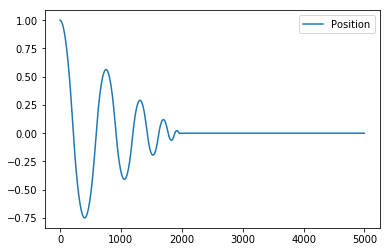

In [234]:
# Plot the data
plt.figure(2)
plt.plot(pos1, label="Position")
#plt.plot(torque1, label="Torque")
#plt.ylim([-2,2])
plt.legend()
plt.show()

In [225]:
print(torque1)

[-100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, 9.943364700256279, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 98.97899600768717, 59.969548096890776, 53.973700469805905, 48.57722724073477, 43.72023093916798, 39.348796247481566, 35.4143932285398, 31.87333995638937, 28.68631866181989, 25.8179400835045, 23.236351238325923, 20.91288229666243, 18.82172867455329, 16.93966483921914, 15.245786671315429, 13.721279540158587, 12.349209530282241, 11.11433551200706, 10.002939977956258, 9.00267677405212, 8.102434039698947, 7.292210839601237, 6.563006120777591, 5.906718764460383, 5.316057625180363, 4.784460559766822, 4.306021548444791, 3.875425099770564, 3.487887211791396, 3.1391022344305695, 2.8251950434803406